In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [21]:
%matplotlib inline

In [22]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Season#,Season,Month,region,weekday vs weekend day
0,51,1/4/15,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,4,Winter,1,Albany,NaN
1,51,1/4/15,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,4,Winter,1,Atlanta,NaN
2,51,1/4/15,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,4,Winter,1,BaltimoreWashington,NaN
3,51,1/4/15,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,4,Winter,1,Boise,NaN
4,51,1/4/15,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,4,Winter,1,Boston,NaN


In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Season#,Season,Month,region,weekday vs weekend day
0,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,4,Winter,1,Albany,NaN
1,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,4,Winter,1,Atlanta,NaN
2,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,4,Winter,1,BaltimoreWashington,NaN
3,51,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,4,Winter,1,Boise,NaN
4,51,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,4,Winter,1,Boston,NaN


In [25]:
df = df.drop(['4046','4225','4770','Large Bags','Small Bags','XLarge Bags','Total Volume'],axis=1)

In [26]:
US = df.loc[(df['region']) == 'TotalUS']  
US.head(5)

,Unnamed: 0,Date,AveragePrice,Total Bags,type,year,Season#,Season,Month,region,weekday vs weekend day
51,51,2015-01-04,0.95,4498940.02,conventional,2015,4,Winter,1,TotalUS,NaN
105,51,2015-01-04,1.46,158641.83,organic,2015,4,Winter,1,TotalUS,NaN
159,50,2015-01-11,1.01,4517384.18,conventional,2015,4,Winter,1,TotalUS,NaN
213,50,2015-01-11,1.42,133760.12,organic,2015,4,Winter,1,TotalUS,NaN
267,49,2015-01-18,1.03,4652069.81,conventional,2015,4,Winter,1,TotalUS,NaN


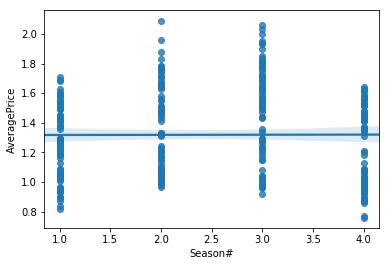

In [27]:
sns.regplot(US['Season#'],US['AveragePrice'])
# Season # 1= Spring #2= Summer #3= Fall #4= Winter

In [28]:
#creating a simple regression model for Season# and Average price

training_data,testing_data = train_test_split(US,train_size = 0.80,random_state = 35)

C:\Users\lmontoni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [29]:
reg = linear_model.LinearRegression()

X_train,Y_train = pd.DataFrame(training_data['Season#']),training_data['AveragePrice']

In [30]:
model = reg.fit(X_train,Y_train)

In [31]:
print("cocoefficient Value: ",(np.float(model.coef_)))
print("Intercept Value: ",(model.intercept_))

cocoefficient Value:  -0.0011291060481288268
Intercept Value:  1.3085276684864935


In [32]:
X_test,Y_test = pd.DataFrame(testing_data['Season#']),testing_data['AveragePrice']

pred = model.predict(X_test)

In [33]:
mean_squared_error(Y_test,pred)

0.09096174029093962

In [34]:
r2_score(Y_test,pred)

-0.05147907590722234

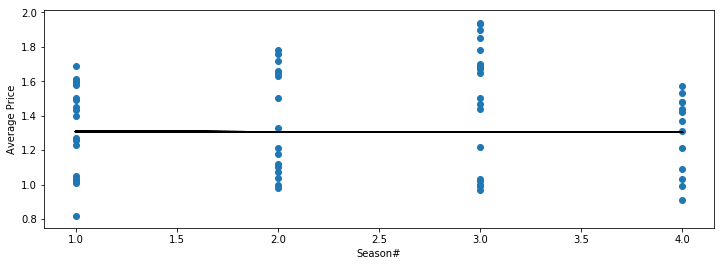

In [35]:
pp.figure(figsize=(12,4))

pp.scatter(X_test,Y_test)
pp.plot(X_test,pred,color = 'black')
pp.ylabel("Average Price")
pp.xlabel("Season#")
pp.show()

In [37]:
df['AveragePrice'].describe(percentiles=[.025, 0.16, 0.8426, 0.9785])

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
2.5%         0.750000
16%          1.000000
50%          1.370000
84.3%        1.810000
97.9%        2.330000
max          3.250000
Name: AveragePrice, dtype: float64

In [41]:
df['AveragePrice'].count()



18249

In [42]:
df['AveragePrice'].max()

3.25

In [43]:
df['AveragePrice'].min()


0.44

In [44]:
df['AveragePrice'].median()


1.37

In [45]:
df['AveragePrice'].mode()

0    1.15
dtype: float64